# LEVEL 3 TASK 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset  (1).csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Analyze if There is a Relationship Between the Price Range and the Availability of Online Delivery and Table Booking

In [3]:
# Convert Categorical variables to numerical (Yes => 1, No =>0)

df['Has Online delivery (Binary)'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking (Binary)'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [4]:
# Group by Price range and calculate the mean availability of services

price_range_analysis = df.groupby('Price range')[['Has Online delivery (Binary)', 'Has Table booking (Binary)']].mean() * 100

print("\nPercentage of Restaurants offering Services (by Price Range):")
price_range_analysis


Percentage of Restaurants offering Services (by Price Range):


,Has Online delivery (Binary),Has Table booking (Binary)
Price range,,
1,15.774077,0.022502
2,41.310633,7.677482
3,29.190341,45.738636
4,9.044369,46.757679


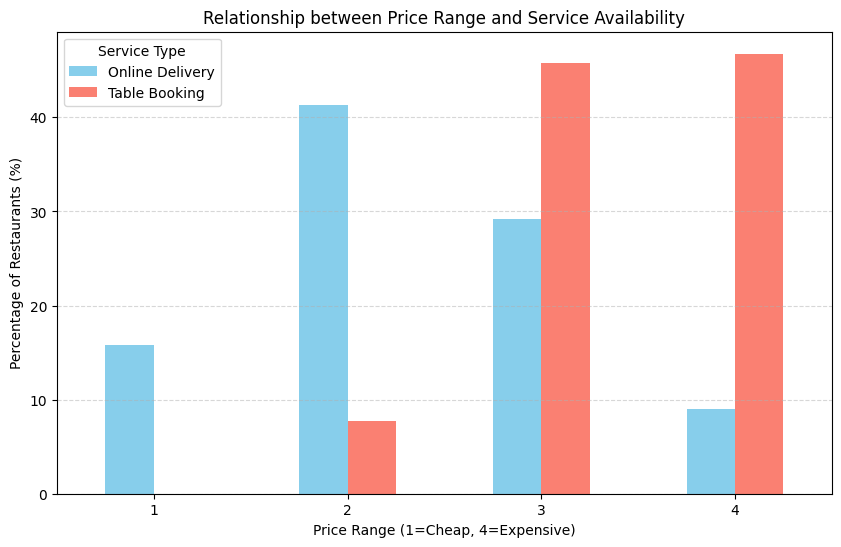

In [5]:
# Plot the relationship

price_range_analysis.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Relationship between Price Range and Service Availability')
plt.xlabel('Price Range (1=Cheap, 4=Expensive)')
plt.ylabel('Percentage of Restaurants (%)')
plt.xticks(rotation=0)
plt.legend(['Online Delivery', 'Table Booking'], title='Service Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Determine if Higher-Priced Restaurants are More Likely to Offer These Services


In [11]:
# Correlation analysis to check the strength of the relationship

Correlation = df[["Price range", "Has Table booking (Binary)", "Has Online delivery (Binary)"]].corr()
Correlation

,Price range,Has Table booking (Binary),Has Online delivery (Binary)
Price range,1.000000,0.501925,0.077918
Has Table booking (Binary),0.501925,1.000000,0.101224
Has Online delivery (Binary),0.077918,0.101224,1.000000


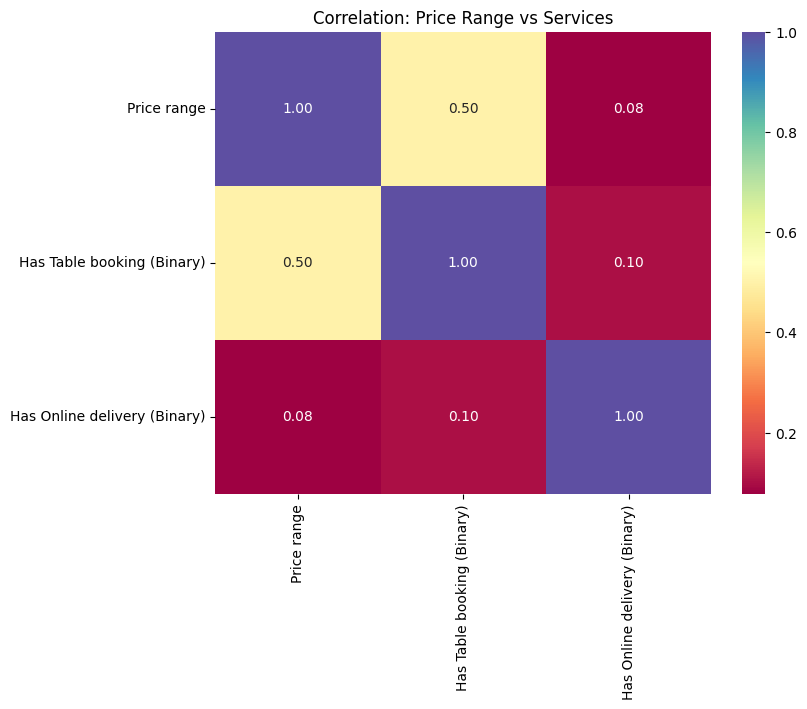

In [10]:
# Create the Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(Correlation, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation: Price Range vs Services')
plt.show()